In [1]:
using Plots
using JLD
using Statistics

pythonplot()

┌ Warning: `PythonPlot` 1.0.3 is not compatible with this version of `Plots`. The declared compatibility is 1 - 1.0.2.
└ @ Plots /home/rdewolfe/.julia/packages/Plots/HyyIK/src/backends.jl:55


Plots.PythonPlotBackend()

In [2]:
#Mean over all but one attribute
function meanOverAllButOneIndex(index::Integer, arr::AbstractArray)
    averageOverIndices = (setdiff(2:length(size(arr)), index)...,)
    meanArray = mean(arr, dims=averageOverIndices)
    reshaped = dropdims(meanArray, dims=averageOverIndices)
    return reshaped
end

#For consistent plotting
function makeplot(x::Array, y::Matrix, title, xlabel, ylabel)
    # Color combination taken from 4 colors for charts
    # https://www.simplifiedsciencepublishing.com/resources/best-color-palettes-for-scientific-figures-and-data-visualizations
    linewidth=3
    markersize=10
    plot(legend=:right, title=title, xlabel=xlabel, ylabel=ylabel, legendfontsize=12, xlabelfontsize=12, ylabelfontsize=12)
    plot!(x, y[1, :], label="Fit", seriescolor=:"#50ad9f", marker=:circle, linewidth=linewidth,  markersize=markersize)
    plot!(x, y[2, :], label="Sym", seriescolor="#0000a2", marker=:square, linewidth=linewidth,  markersize=markersize)
    plot!(x, y[3, :], label="Flat", seriescolor=:"#bc272d", marker=:cross, linewidth=linewidth,  markersize=markersize)
    plot!(x, y[4, :], label="Perm", seriescolor=:"#e9c716", marker=:utriangle, linewidth=linewidth,  markersize=markersize)
end

makeplot (generic function with 1 method)

# Two Sided Results

In [3]:
run1 = load("Data/FactorialSimulationTwoSided1.jld")["results"]
run2 = load("Data/FactorialSimulationTwoSided2.jld")["results"]
run3 = load("Data/FactorialSimulationTwoSided3.jld")["results"]
run4 = load("Data/FactorialSimulationTwoSided4.jld")["results"]
run5 = load("Data/FactorialSimulationTwoSided5.jld")["results"]

results = cat(run1, run2, run3, run4, run5, dims=7)

print(size(results))

#Indexes are (Model, NumClusters, NumObservations, SizeImbalance, Precision, AmountRandomized, Run)

(4, 7, 7, 4, 5, 5, 5)

In [4]:
numClusters      = meanOverAllButOneIndex(2, results)
numObservations  = meanOverAllButOneIndex(3, results)
sizeImbalance    = meanOverAllButOneIndex(4, results)
precision        = meanOverAllButOneIndex(5, results)
amountRandomized = meanOverAllButOneIndex(6, results)

4×5 Matrix{Float64}:
 0.670986  0.406479    0.198351   0.0479285   0.0595363
 0.493814  0.0772627  -0.253994  -0.494117   -0.611128
 0.469603  0.0381243  -0.299766  -0.536571   -0.679188
 0.652587  0.392751    0.202874   0.0766882   7.1723e-5

# Two Side Plots

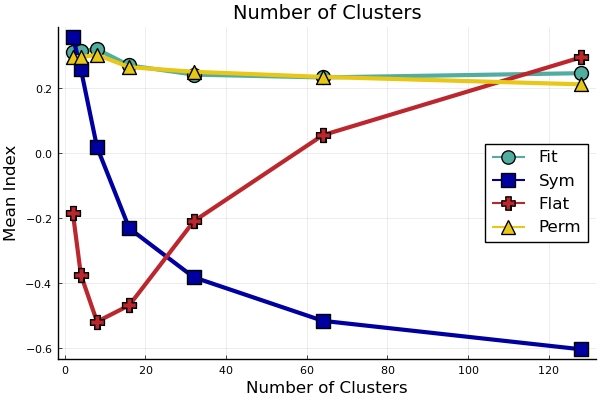

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [5]:
numClustersList = [2, 4, 8, 16, 32, 64, 128]
makeplot(numClustersList, numClusters, "Number of Clusters", "Number of Clusters", "Mean Index")
#savefig("FactorialTwoSideNumberClusters.eps")

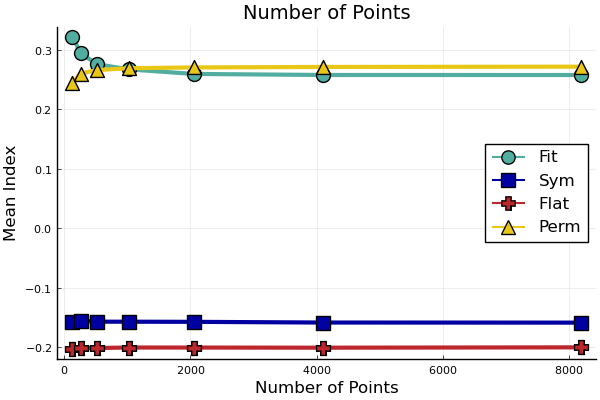

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [6]:
numObservationsList = [128, 256, 512, 1024, 2048, 4096, 8192]
makeplot(numObservationsList, numObservations, "Number of Points", "Number of Points", "Mean Index")
#savefig("FactorialTwoSideNumberPoints.eps")

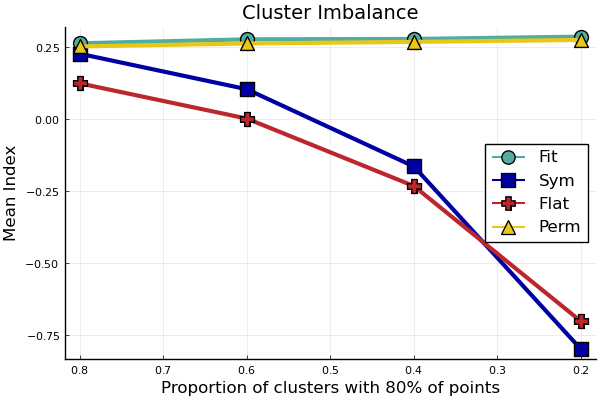

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [7]:
sizeImbalanceList = [0.8, 0.6, 0.4, 0.2]
makeplot(sizeImbalanceList, sizeImbalance, "Cluster Imbalance", "Proportion of clusters with 80% of points", "Mean Index")
xflip!(true) # Make Imbalance increase from left to right
#savefig("FactorialTwoSideClusterImbalance.eps")

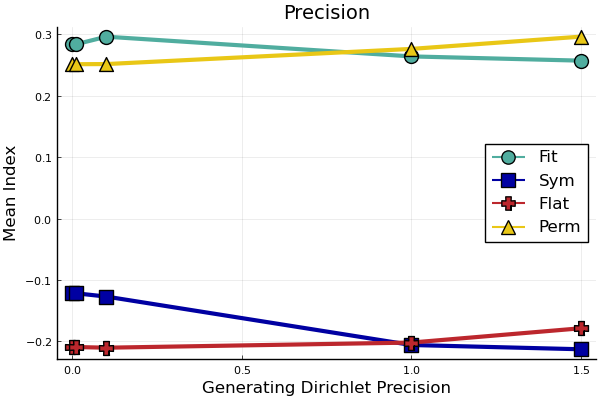

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [8]:
precisionList = [0, 0.01, 0.1,  1, 1.5]
makeplot(precisionList, precision, "Precision", "Generating Dirichlet Precision", "Mean Index")
#savefig("FactorialTwoSidePrecision.eps")

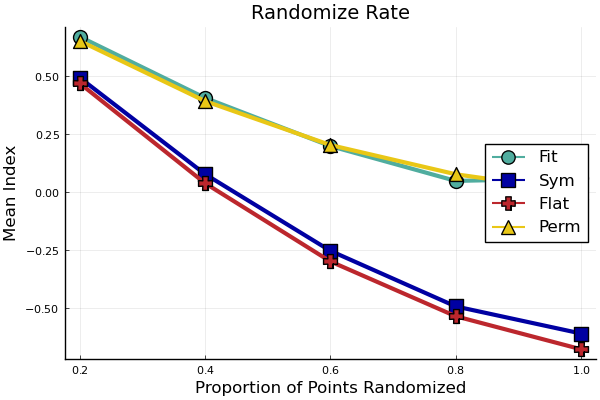

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [9]:
amountRandomizedList = [0.2, 0.4, 0.6, 0.8, 1.0]
makeplot(amountRandomizedList, amountRandomized, "Randomize Rate", "Proportion of Points Randomized", "Mean Index")
#savefig("FactorialTwoSideRandomizeRate.eps")

### Maximum Fit / Perm Disagreement

In [10]:
diff = [
    abs.(numClusters[1, :] - numClusters[4, :]),
    abs.(numObservations[1, :] - numObservations[4, :]),
    abs.(sizeImbalance[1, :] - sizeImbalance[4, :]),
    abs.(precision[1, :] - precision[4, :]),
    abs.(amountRandomized[1, :] - amountRandomized[4, :])
]
maximum(maximum(diff))

0.07738823037243239

# One Sided Comparison

In [11]:
run1 = load("Data/FactorialSimulationOneSided1.jld")["results"]
run2 = load("Data/FactorialSimulationOneSided2.jld")["results"]
run3 = load("Data/FactorialSimulationOneSided3.jld")["results"]
run4 = load("Data/FactorialSimulationOneSided4.jld")["results"]
run5 = load("Data/FactorialSimulationOneSided5.jld")["results"]

results = cat(run1, run2, run3, run4, run5, dims=7)

print(size(results))

#Indexes are (Model, NumClusters, NumObservations, SizeImbalance, Precision, AmountRandomized, Run)

(4, 7, 7, 4, 5, 5, 5)

In [12]:
numClusters      = meanOverAllButOneIndex(2, results)
numObservations  = meanOverAllButOneIndex(3, results)
sizeImbalance    = meanOverAllButOneIndex(4, results)
precision        = meanOverAllButOneIndex(5, results)
amountRandomized = meanOverAllButOneIndex(6, results)

4×5 Matrix{Float64}:
 0.664221  0.389147  0.172172    0.0128502   0.0541336
 0.623809  0.313405  0.0674891  -0.11171    -0.179784
 0.851272  0.728754  0.632859    0.563238    0.519095
 0.644979  0.37222   0.176619    0.0549597   4.59533e-5

### One Side Plots

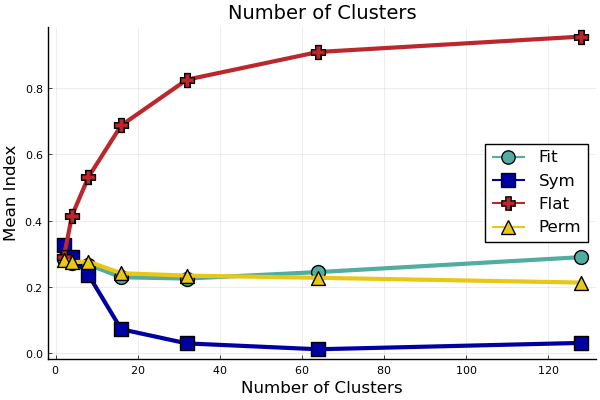

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [13]:
numClustersList = [2, 4, 8, 16, 32, 64, 128]
makeplot(numClustersList, numClusters, "Number of Clusters", "Number of Clusters", "Mean Index")
#savefig("FactorialOneSideNumberClusters.eps")

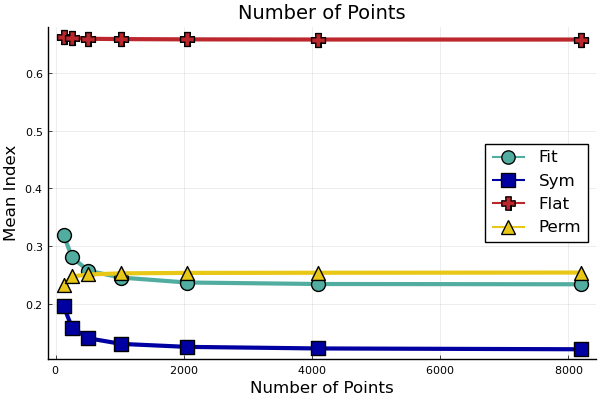

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [14]:
numObservationsList = [128, 256, 512, 1024, 2048, 4096, 8192]
makeplot(numObservationsList, numObservations, "Number of Points", "Number of Points", "Mean Index")
#savefig("FactorialOneSideNumberPoints.eps")

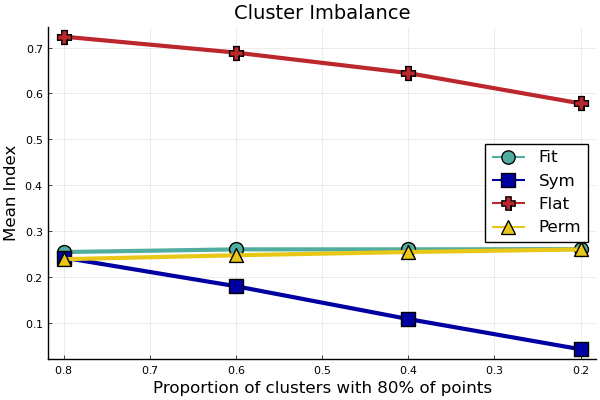

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [15]:
sizeImbalanceList = [0.8, 0.6, 0.4, 0.2]
makeplot(sizeImbalanceList, sizeImbalance, "Cluster Imbalance", "Proportion of clusters with 80% of points", "Mean Index")
xflip!(true) # Make Imbalance increase from left to right
#savefig("FactorialOneSideClusterImbalance.eps")

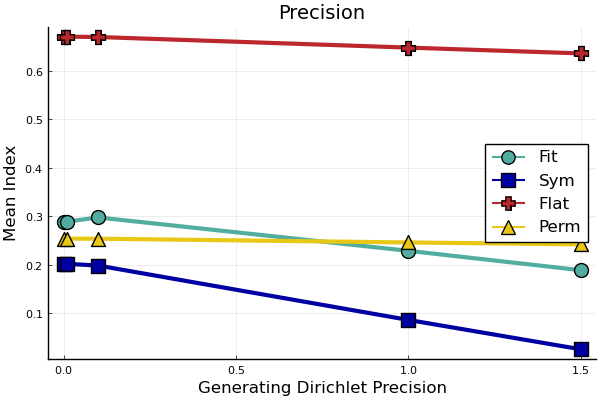

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [16]:
precisionList = [0, 0.01, 0.1,  1, 1.5]
makeplot(precisionList, precision, "Precision", "Generating Dirichlet Precision", "Mean Index")
#savefig("FactorialOneSidePrecision.eps")

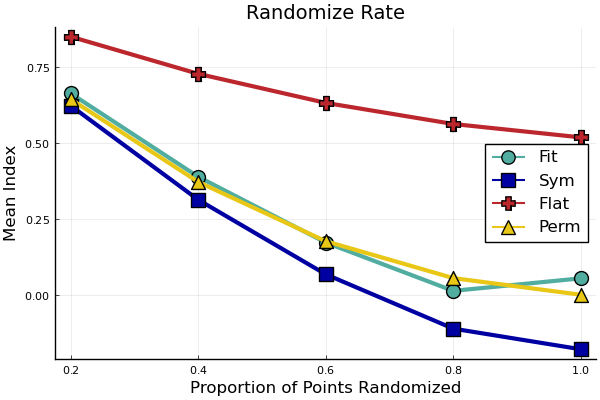

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [17]:
amountRandomizedList = [0.2, 0.4, 0.6, 0.8, 1.0]
makeplot(amountRandomizedList, amountRandomized, "Randomize Rate", "Proportion of Points Randomized", "Mean Index")
#savefig("FactorialOneSideRandomizeRate.eps")

### Maximum Fit/Perm disagreement

In [18]:
diff = [
    abs.(numClusters[1, :] - numClusters[4, :]),
    abs.(numObservations[1, :] - numObservations[4, :]),
    abs.(sizeImbalance[1, :] - sizeImbalance[4, :]),
    abs.(precision[1, :] - precision[4, :]),
    abs.(amountRandomized[1, :] - amountRandomized[4, :])
]
maximum(maximum(diff))

0.08539841843249654